In [1]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
train_dir =r"D:\Porject\archive\Plant Diseases Dataset\Plant Diseases Dataset\train"
test_dir=r"D:\Porject\archive\Plant Diseases Dataset\Plant Diseases Dataset\test"

In [3]:
# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [4]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir)
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

10 Classes
18344 Train images
16 Test images


In [5]:
# Pre-processing data with parameters.
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
# set height and width and color of input image.
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32
train_generator =train_datagen.flow_from_directory(train_dir,
                                target_size=(img_width,img_height),                                                    batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,target_size=(img_width,img_height),                                               batch_size=batch_size)

Found 18344 images belonging to 10 classes.
Found 16 images belonging to 1 classes.


In [7]:
# The name of the 9 diseases.
train_generator.class_indices

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [8]:
# CNN building.
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 82, 82, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 23104)             0

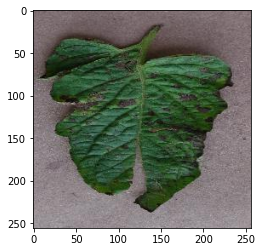

In [9]:
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image

img1 = image.load_img(r'D:/Porject/archive/Plant Diseases Dataset/Plant Diseases Dataset/train/Tomato___Early_blight/a0cb35c3-0ae6-4b64-a42f-d14006f3d315___RS_Erly.B 7357_180deg.JPG')
plt.imshow(img1);
#preprocess image
img1 = image.load_img(r'D:/Porject/archive/Plant Diseases Dataset/Plant Diseases Dataset/train/Tomato___Early_blight/a0cb35c3-0ae6-4b64-a42f-d14006f3d315___RS_Erly.B 7357_180deg.JPG', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [10]:
validation_generator = train_datagen.flow_from_directory(
                       train_dir, # same directory as training data
                       target_size=(img_height, img_width),
                       batch_size=batch_size)
opt=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
train=model.fit(train_generator,epochs=20,   
steps_per_epoch=train_generator.samples//batch_size,   
validation_data=validation_generator,validation_steps=validation_generator.samples // batch_size,verbose=1)

Found 18344 images belonging to 10 classes.
Epoch 1/20
272/573 [=============>................] - ETA: 5:44 - loss: 1.5913 - accuracy: 0.4227

KeyboardInterrupt: 

In [38]:
# Save model
from tensorflow.keras.models import load_model
model.save('Crop Disease.h5') 

In [39]:
# Loading model and predict.
from tensorflow.keras.models import load_model
model=load_model('Crop Disease.h5')
# Mention name of the disease into list.
Classes = ["Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___Late_blight","Tomato___Leaf_Mold","Tomato___Septoria_leaf_spot","Tomato___Spider_mites Two-spotted_spider_mite","Tomato___Target_Spot","Tomato___Tomato_mosaic_virus","Tomato___healthy"]

Tomato___Tomato_mosaic_virus


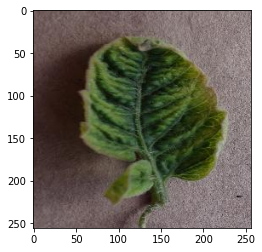

In [53]:
import numpy as np
import matplotlib.pyplot as plt
# Pre-Processing test data same as train data.
img_width=256
img_height=256
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
from tensorflow.keras.preprocessing import image
def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_classes([prepare('D:/Porject/archive/Plant Diseases Dataset/Plant Diseases Dataset/test/test/TomatoYellowCurlVirus2.JPG')])


In [54]:
# Save model
from tensorflow.keras.models import load_model
model.save('Crop Disease.h5')

In [9]:
import tensorflow

ModuleNotFoundError: No module named 'tensorflow'